# 'geopandas

GeoPandas is a python library that extends 'pandas' by adding support for geospatial data.

## Reproducible file paths

In [16]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

To import data we first use 'os' pachage to create a reproducible file path:

In [32]:
fp = os.path.join('data','gbif_sus_scrofa_california','gbif_sus_scrofa_california.shp')
fp

'data/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp'

In [33]:
pigs = gpd.read_file(fp)
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


In [36]:
fp = os.path.join("data", "ca_state_boundary", "ca_state_boundary.shp")
ca_boundary = gpd.read_file(fp)
ca_boundary.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


## 'Geoseries' and 'GeoDataFrame'

'geopandas.GeoDataFrame' = core structure in geopandas = 'pandas.DataFrame' plus a dedicated 'geometry' column that can perform spatial operations.

**geometry column**: holds the geometry objects (points, lines, polygons) of each spatial feature. The type of this columns 'geopandas.GeoSeries'.

In [37]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [38]:
# Check the data ftype of the pigs dataframe
print(type(pigs))

# Check the data type of the geometry column
print(type(pigs.geometry))

# Check the data type of the gbifID column
print(type(pigs['gbifID']))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


What is a geometry type of the single feature in the CA state boundary?

In [39]:
ca_boundary.geom_type

0    MultiPolygon
dtype: object

## CRS

**coordinate reference system (CRS)**

In [40]:
# Access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
# Examine CRS details
print('Ellipsoid: ', pigs.crs.ellipsoid)
print('Datum: ', pigs.crs.datum)
print('Is geographic?: ', pigs.crs.is_geographic)
print('Is projected?: ', pigs.crs.is_projected)

Ellipsoid:  WGS 84
Datum:  World Geodetic System 1984 ensemble
Is geographic?:  True
Is projected?:  False


In [42]:
# Obtain the geographic extent of the geo-dataframe
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

In [44]:
# Examine CRS and extent of CA boundary
print('CRS: ', ca_boundary.crs, '\n')
print(ca_boundary.total_bounds)

CRS:  EPSG:4326 

[-124.48201686   32.52883674 -114.13122248   42.00950827]


##

## Data wrangling

You can use all uou 'pandas' data wrangling to wrangle geopandas

In [45]:
# Examine pig observations by year
pigs['year'].value_counts().sort_index()

year
1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: count, Length: 61, dtype: int64

In [47]:
# Select data from 2020 onwards
pigs_recent = pigs[pigs['year']> 2020]

# Check the length of the original data frame
print('Total nnumber of observatuons: ', len(pigs))

# Check length of new dataframe
print('Number of observations since 2020L ', len(pigs_recent))

Total nnumber of observatuons:  1046
Number of observations since 2020L  447


# Create a map (preliminary)

<Axes: >

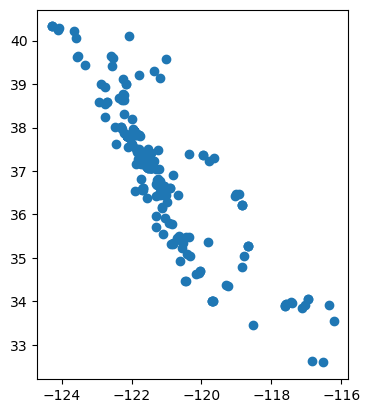

In [48]:
pigs_recent.plot()